A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

MPRestError: REST query returned with error status code 403. Content: b'{"valid_response": false, "version": {"pymatgen": "2018.3.13", "db": "2.0.0", "rest": "2.0"}, "created_at": "2018-04-12T08:03:09.738771", "error": "API_KEY is not supplied."}'

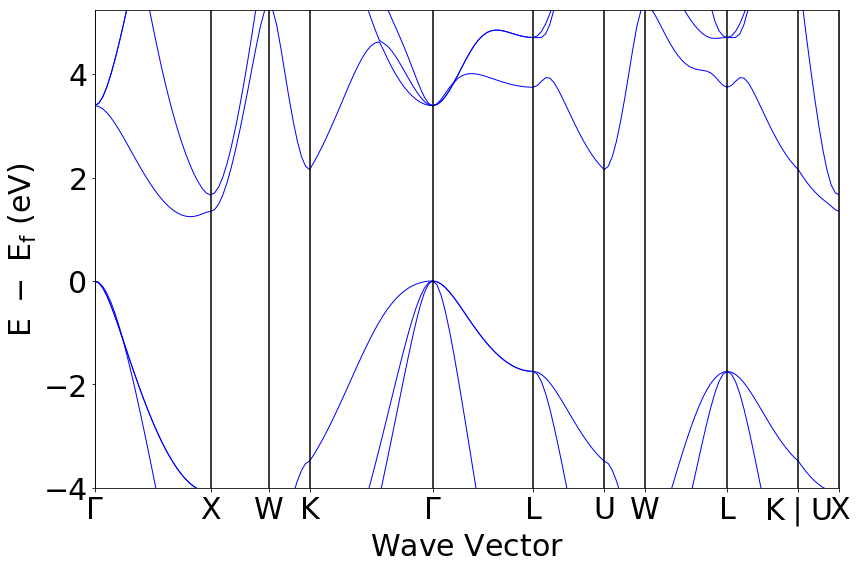

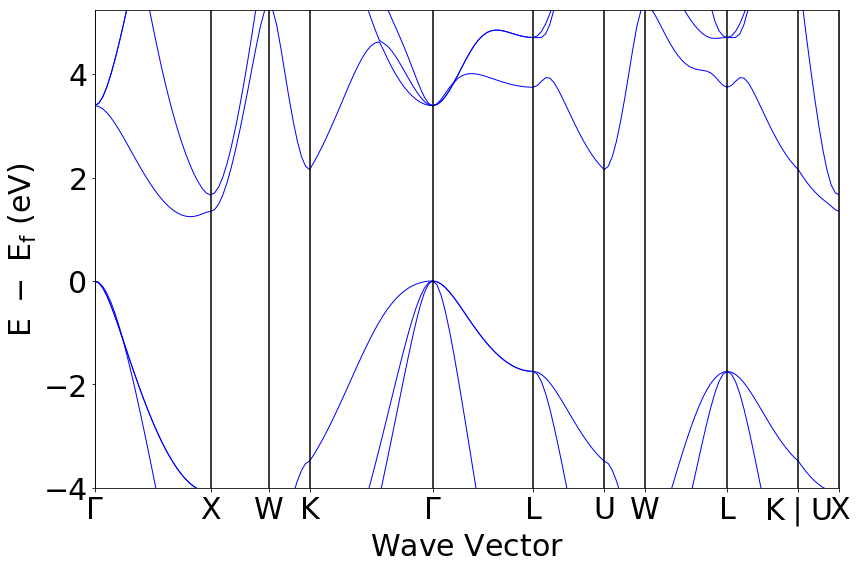

In [2]:
from ipywidgets import widgets
from IPython.display import display
from pymatgen.ext.matproj import MPRester



API=widgets.Text(value='',description='Materials Project API:')
display(API)


MaterialsID=widgets.Text(value='mp-1479',description='Materials ID')
display(MaterialsID)



print('')
StrategyButton=widgets.RadioButtons(
    options=['Plotte Bandstruktur', 'Bandluecke', 'Direkte Bandluecke','Metall'],
    value='Plotte Bandstruktur',
    description='Elektronenstruktur:',
    disabled=False
)
display(StrategyButton)


# add button that updates everything
button = widgets.Button(description="Start")
display(button)



def on_button_clicked(b):
    run()
    
def run():
    a = MPRester(API.value)
    
    struct = a.get_structure_by_material_id(MaterialsID.value)
    bs = a.get_bandstructure_by_material_id(MaterialsID.value)
    if StrategyButton.value=='Metall':
        if bs.is_metal()==True:
            print("Die Verbindung ist ein Leiter")
        else:
            print("Die Verbindung ist kein Leiter")
    elif StrategyButton.value=='Bandluecke':
        bandgapdict=bs.get_band_gap()
        print("Die Bandluecke betraegt: "+str(bandgapdict['energy'])+' eV')
    elif StrategyButton.value=='Direkte Bandluecke':
        print("Die direkte Bandluecke betraegt: "+str(bs.get_direct_band_gap())+' eV')
    elif StrategyButton.value=='Plotte Bandstruktur':
        %matplotlib inline
        from pymatgen.electronic_structure.plotter import BSPlotter
        plotter = BSPlotter(bs)
        plotter.get_plot().show()
    
    
    
    
button.on_click(on_button_clicked)    
    

